## Mount

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df=pd.read_csv("/content/bank.csv")

In [ ]:
df.shape

(41188, 21)

In [ ]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
0,44,blue-collar,married,basic.4y,unknown,yes,no,cellular,aug,thu,210,1,999,0,nonexistent,1.4,93.444,-36.1,4.963,5228.1,0
1,53,technician,married,unknown,no,no,no,cellular,nov,fri,138,1,999,0,nonexistent,-0.1,93.200,-42.0,4.021,5195.8,0
2,28,management,single,university.degree,no,yes,no,cellular,jun,thu,339,3,6,2,success,-1.7,94.055,-39.8,0.729,4991.6,1
3,39,services,married,high.school,no,no,no,cellular,apr,fri,185,2,999,0,nonexistent,-1.8,93.075,-47.1,1.405,5099.1,0
4,55,retired,married,basic.4y,no,yes,no,cellular,aug,fri,137,1,3,1,success,-2.9,92.201,-31.4,0.869,5076.2,1


In [ ]:
df.describe()

,age,duration,campaign,pdays,previous,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911,0.112654
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528,0.316173
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000,0.000000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000,0.000000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000,0.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000,0.000000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000,1.000000


## Checking Missing Values
No missing values in data

In [ ]:
df.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp_var_rate      0
cons_price_idx    0
cons_conf_idx     0
euribor3m         0
nr_employed       0
y                 0
dtype: int64

In [ ]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp_var_rate', 'cons_price_idx',
       'cons_conf_idx', 'euribor3m', 'nr_employed', 'y'],
      dtype='object')

In [ ]:
num_data = df.select_dtypes(include='number')
num_data.head()

,age,duration,campaign,pdays,previous,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
0,44,210,1,999,0,1.4,93.444,-36.1,4.963,5228.1,0
1,53,138,1,999,0,-0.1,93.200,-42.0,4.021,5195.8,0
2,28,339,3,6,2,-1.7,94.055,-39.8,0.729,4991.6,1
3,39,185,2,999,0,-1.8,93.075,-47.1,1.405,5099.1,0
4,55,137,1,3,1,-2.9,92.201,-31.4,0.869,5076.2,1


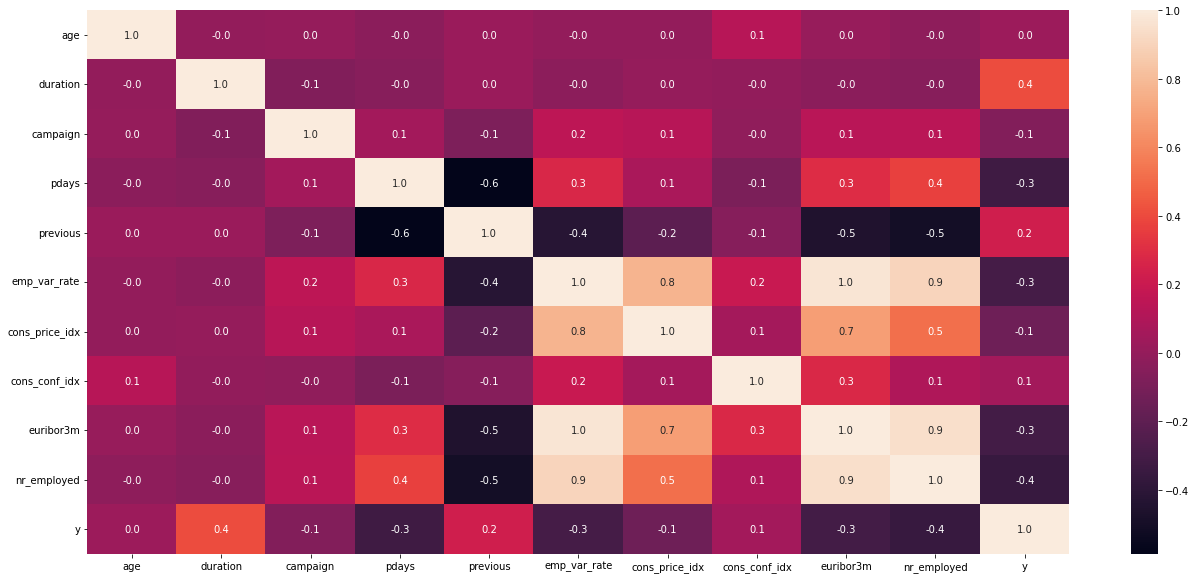

In [ ]:
plt.rcParams['figure.figsize']=(22,10)
sns.heatmap(df.corr(),annot=True, fmt='0.1f')
plt.show()

## Split the data

In [ ]:
X = df.drop('y',axis=1)
Y = df['y']

In [ ]:
X.shape, Y.shape

((41188, 20), (41188,))

## Train Test Split

In [ ]:
from sklearn.model_selection import train_test_split
# split into train and test datasets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3,random_state=7)
print(X_train.shape, X_test.shape, Y_train.shape, Y_test.shape)

(28831, 20) (12357, 20) (28831,) (12357,)


## One Hot Encoding

In [ ]:
X_train = pd.get_dummies(X_train)

In [ ]:
X_test = pd.get_dummies(X_test)

In [ ]:
print(X_train.shape, X_test.shape, Y_train.shape, Y_test.shape)

(28831, 63) (12357, 63) (28831,) (12357,)


In [ ]:
X_train.columns

Index(['age', 'duration', 'campaign', 'pdays', 'previous', 'emp_var_rate',
       'cons_price_idx', 'cons_conf_idx', 'euribor3m', 'nr_employed',
       'job_admin.', 'job_blue-collar', 'job_entrepreneur', 'job_housemaid',
       'job_management', 'job_retired', 'job_self-employed', 'job_services',
       'job_student', 'job_technician', 'job_unemployed', 'job_unknown',
       'marital_divorced', 'marital_married', 'marital_single',
       'marital_unknown', 'education_basic.4y', 'education_basic.6y',
       'education_basic.9y', 'education_high.school', 'education_illiterate',
       'education_professional.course', 'education_university.degree',
       'education_unknown', 'default_no', 'default_unknown', 'default_yes',
       'housing_no', 'housing_unknown', 'housing_yes', 'loan_no',
       'loan_unknown', 'loan_yes', 'contact_cellular', 'contact_telephone',
       'month_apr', 'month_aug', 'month_dec', 'month_jul', 'month_jun',
       'month_mar', 'month_may', 'month_nov', 'month_oc

In [ ]:
X=pd.get_dummies(X)
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 63 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   age                            41188 non-null  int64  
 1   duration                       41188 non-null  int64  
 2   campaign                       41188 non-null  int64  
 3   pdays                          41188 non-null  int64  
 4   previous                       41188 non-null  int64  
 5   emp_var_rate                   41188 non-null  float64
 6   cons_price_idx                 41188 non-null  float64
 7   cons_conf_idx                  41188 non-null  float64
 8   euribor3m                      41188 non-null  float64
 9   nr_employed                    41188 non-null  float64
 10  job_admin.                     41188 non-null  uint8  
 11  job_blue-collar                41188 non-null  uint8  
 12  job_entrepreneur               41188 non-null 

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


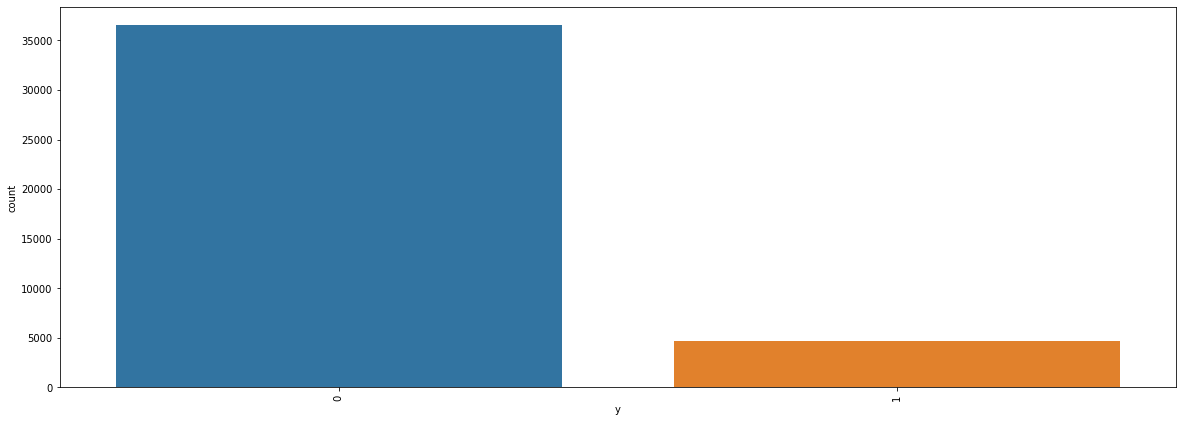

In [ ]:
df.y.value_counts()
plt.figure(figsize=(20,7))
plt.xticks(rotation=90)
sns.countplot('y',data=df)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


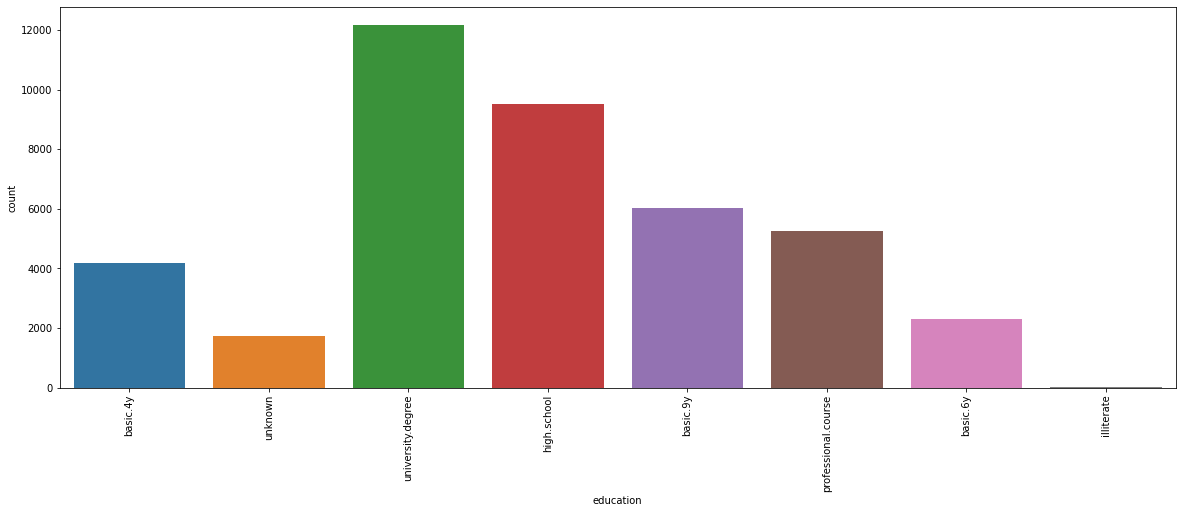

In [ ]:
df.education.value_counts()
plt.figure(figsize=(20,7))
plt.xticks(rotation=90)
sns.countplot('education',data=df)

In [ ]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 28831 entries, 28383 to 10742
Data columns (total 63 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   age                            28831 non-null  int64  
 1   duration                       28831 non-null  int64  
 2   campaign                       28831 non-null  int64  
 3   pdays                          28831 non-null  int64  
 4   previous                       28831 non-null  int64  
 5   emp_var_rate                   28831 non-null  float64
 6   cons_price_idx                 28831 non-null  float64
 7   cons_conf_idx                  28831 non-null  float64
 8   euribor3m                      28831 non-null  float64
 9   nr_employed                    28831 non-null  float64
 10  job_admin.                     28831 non-null  uint8  
 11  job_blue-collar                28831 non-null  uint8  
 12  job_entrepreneur               28831 non-n

## Check Imbalace Data

In [ ]:
Y_train.value_counts()

0    25565
1     3266
Name: y, dtype: int64

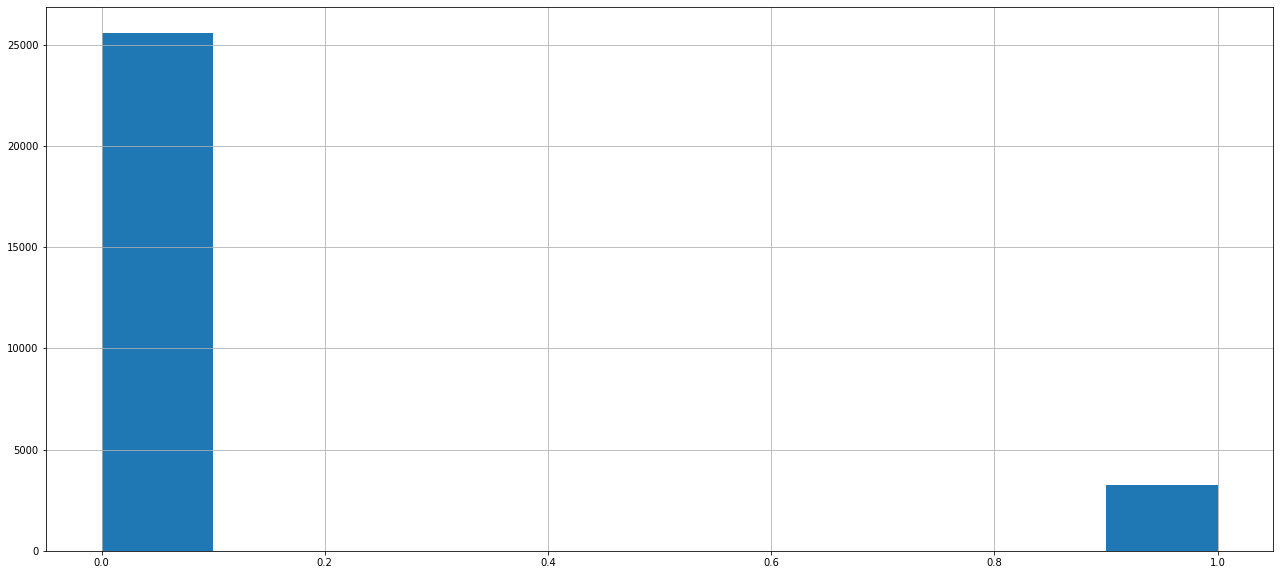

In [ ]:
Y_train.hist()

## Data is not Balance 
- Balanced the data using under sampling technique

In [ ]:
df_c1 = X_train.loc[Y_train==0,:]
df_c2 = X_train.loc[Y_train==1,:]

In [ ]:
df_c1 = df_c1.sample(df_c2.shape[0],random_state=7)

In [ ]:
df_c1.shape , df_c2.shape

((3266, 63), (3266, 63))

In [ ]:
X_train_new = pd.concat([df_c1,df_c2])

In [ ]:
Y_train_new = Y_train[X_train_new.index]

In [ ]:
X_train_new.shape,Y_train_new.shape

((6532, 63), (6532,))

In [ ]:
Y_train_new.value_counts()

1    3266
0    3266
Name: y, dtype: int64

## Decision Tree Classifier

In [ ]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(max_depth=5)

In [ ]:
model.fit(X_train_new,Y_train_new)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=5, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [ ]:
Y_predict=model.predict(X_test)

In [ ]:
from sklearn.metrics import confusion_matrix,accuracy_score
# Calculate Confusion Matrix
cf_mat=confusion_matrix(Y_test,Y_predict)

# Calculate Accuracy
acc = accuracy_score(Y_test,Y_predict)

#Print Results
print("Confusion Matrix \n",cf_mat)
print("Accuracy : ",acc)

Confusion Matrix 
 [[9247 1736]
 [ 116 1258]]
Accuracy :  0.8501254349761269


-
-Here Accuracy of the data is 85.01% this means Decision Tree is good fit for our data

In [ ]:
from sklearn.metrics import precision_recall_fscore_support
precision_recall_fscore_support(Y_test, Y_predict)

(array([0.98761081, 0.42017368]),
 array([0.84193754, 0.91557496]),
 array([0.90897474, 0.57600733]),
 array([10983,  1374]))

In [ ]:
from sklearn import tree

In [ ]:
fn = list(X.columns) # feature names
cn = ['Yes', 'No'] # category names

[Text(613.8000000000001, 498.3, 'duration <= 269.5\ngini = 0.5\nsamples = 6532\nvalue = [3266, 3266]\nclass = Yes'),
 Text(306.90000000000003, 407.70000000000005, 'nr_employed <= 5087.65\ngini = 0.392\nsamples = 3273\nvalue = [2398, 875]\nclass = Yes'),
 Text(153.45000000000002, 317.1, 'duration <= 123.5\ngini = 0.36\nsamples = 859\nvalue = [202, 657]\nclass = No'),
 Text(76.72500000000001, 226.5, 'poutcome_success <= 0.5\ngini = 0.49\nsamples = 172\nvalue = [98, 74]\nclass = Yes'),
 Text(38.362500000000004, 135.89999999999998, 'duration <= 64.0\ngini = 0.441\nsamples = 134\nvalue = [90, 44]\nclass = Yes'),
 Text(19.181250000000002, 45.299999999999955, 'gini = 0.0\nsamples = 21\nvalue = [21, 0]\nclass = Yes'),
 Text(57.54375, 45.299999999999955, 'gini = 0.476\nsamples = 113\nvalue = [69, 44]\nclass = Yes'),
 Text(115.0875, 135.89999999999998, 'pdays <= 3.5\ngini = 0.332\nsamples = 38\nvalue = [8, 30]\nclass = No'),
 Text(95.90625000000001, 45.299999999999955, 'gini = 0.159\nsamples = 2

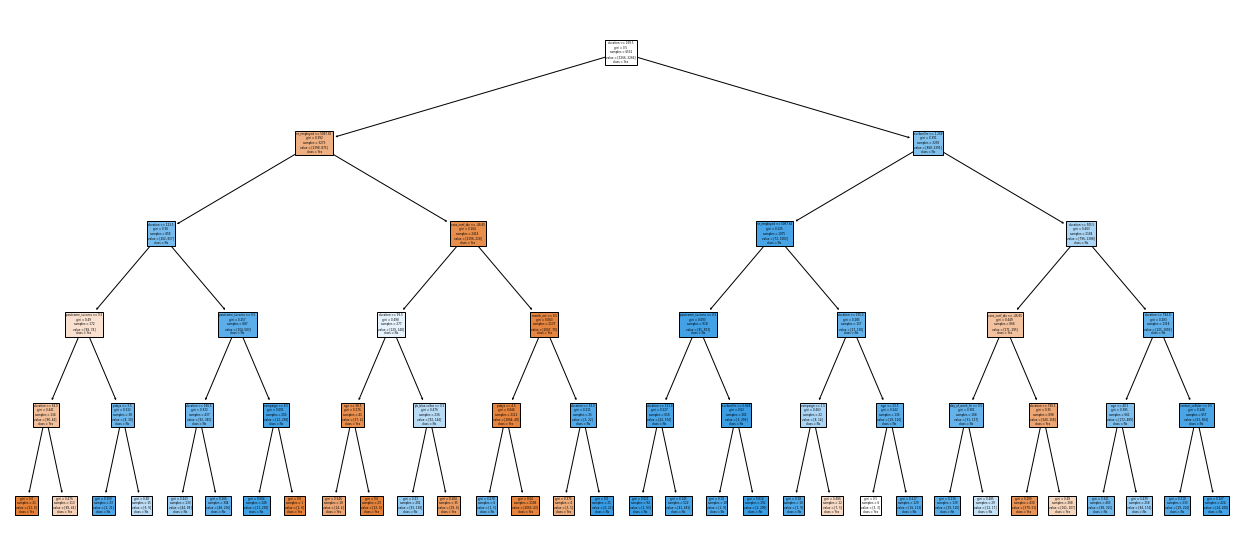

In [ ]:
tree.plot_tree(model,feature_names = fn, 
               class_names=cn,
               filled = True)

In [ ]:
# from sklearn.tree.export import export_text
from sklearn.tree import export_text
tree_rules = export_text(model, feature_names=fn)

In [ ]:
print(tree_rules)

|--- duration <= 269.50
|   |--- nr_employed <= 5087.65
|   |   |--- duration <= 123.50
|   |   |   |--- poutcome_success <= 0.50
|   |   |   |   |--- duration <= 64.00
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- duration >  64.00
|   |   |   |   |   |--- class: 0
|   |   |   |--- poutcome_success >  0.50
|   |   |   |   |--- pdays <= 3.50
|   |   |   |   |   |--- class: 1
|   |   |   |   |--- pdays >  3.50
|   |   |   |   |   |--- class: 1
|   |   |--- duration >  123.50
|   |   |   |--- poutcome_success <= 0.50
|   |   |   |   |--- duration <= 166.50
|   |   |   |   |   |--- class: 1
|   |   |   |   |--- duration >  166.50
|   |   |   |   |   |--- class: 1
|   |   |   |--- poutcome_success >  0.50
|   |   |   |   |--- campaign <= 6.50
|   |   |   |   |   |--- class: 1
|   |   |   |   |--- campaign >  6.50
|   |   |   |   |   |--- class: 0
|   |--- nr_employed >  5087.65
|   |   |--- cons_conf_idx <= -46.65
|   |   |   |--- duration <= 93.50
|   |   |   |   |--- age <= 38.5

## Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier(random_state=7)

In [ ]:
rfc.fit(X_train_new,Y_train_new)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=7, verbose=0,
                       warm_start=False)

In [ ]:
Y_predict=rfc.predict(X_test)

In [ ]:
from sklearn.metrics import confusion_matrix,accuracy_score
# Calculate Confusion Matrix
cf_mat=confusion_matrix(Y_test,Y_predict)

# Calculate Accuracy
acc = accuracy_score(Y_test,Y_predict)

#Print Results
print("Confusion Matrix \n",cf_mat)
print("Accuracy : ",acc)

Confusion Matrix 
 [[9242 1741]
 [ 103 1271]]
Accuracy :  0.8507728413045238


In [ ]:
from sklearn.metrics import precision_recall_fscore_support
precision_recall_fscore_support(Y_test, Y_predict)

(array([0.98897806, 0.42197875]),
 array([0.84148229, 0.92503639]),
 array([0.90928768, 0.57957136]),
 array([10983,  1374]))

##Fine Tuning

In [ ]:
param_grid = { 
    'n_estimators': [2000,5000,3000],
    'max_depth' : [8,5,9],
    'min_samples_split' : [5,10,15]
    
}

In [ ]:
rfc=RandomForestClassifier(random_state=7)

In [ ]:
from sklearn.model_selection import GridSearchCV
CV_rfc = GridSearchCV(estimator=rfc, param_grid=param_grid,\
                      cv= 2, verbose=2)

In [ ]:
CV_rfc.fit(X_train_new,Y_train_new)

Fitting 2 folds for each of 27 candidates, totalling 54 fits
[CV] max_depth=8, min_samples_split=5, n_estimators=2000 .............


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  max_depth=8, min_samples_split=5, n_estimators=2000, total=   6.9s
[CV] max_depth=8, min_samples_split=5, n_estimators=2000 .............


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    6.9s remaining:    0.0s


[CV]  max_depth=8, min_samples_split=5, n_estimators=2000, total=   6.9s
[CV] max_depth=8, min_samples_split=5, n_estimators=5000 .............
[CV]  max_depth=8, min_samples_split=5, n_estimators=5000, total=  17.2s
[CV] max_depth=8, min_samples_split=5, n_estimators=5000 .............
[CV]  max_depth=8, min_samples_split=5, n_estimators=5000, total=  17.1s
[CV] max_depth=8, min_samples_split=5, n_estimators=3000 .............
[CV]  max_depth=8, min_samples_split=5, n_estimators=3000, total=  10.2s
[CV] max_depth=8, min_samples_split=5, n_estimators=3000 .............
[CV]  max_depth=8, min_samples_split=5, n_estimators=3000, total=  10.2s
[CV] max_depth=8, min_samples_split=10, n_estimators=2000 ............
[CV]  max_depth=8, min_samples_split=10, n_estimators=2000, total=   6.8s
[CV] max_depth=8, min_samples_split=10, n_estimators=2000 ............
[CV]  max_depth=8, min_samples_split=10, n_estimators=2000, total=   6.8s
[CV] max_depth=8, min_samples_split=10, n_estimators=5000 ...

[Parallel(n_jobs=1)]: Done  54 out of  54 | elapsed:  9.8min finished


GridSearchCV(cv=2, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False, random_state=7,
                                   

In [ ]:
Y_predict=CV_rfc.predict(X_test)

In [ ]:
print(CV_rfc.best_params_)
print(CV_rfc.cv_results_['mean_test_score'])
print(sum(CV_rfc.cv_results_['mean_test_score'])/ len(CV_rfc.cv_results_['mean_test_score']))

{'max_depth': 9, 'min_samples_split': 5, 'n_estimators': 5000}
[0.87630129 0.8759951  0.87645438 0.87538273 0.8759951  0.87522964
 0.87706675 0.87676056 0.87706675 0.8413962  0.84200857 0.84200857
 0.83925291 0.8415493  0.84017146 0.84047765 0.84292713 0.84063074
 0.87676056 0.87829149 0.87706675 0.87767912 0.8781384  0.87752603
 0.87752603 0.87829149 0.87767912]
0.8650234741784035


##Model fitting using Best params

In [ ]:
new_rfc=RandomForestClassifier(max_depth= 9, min_samples_split= 5, n_estimators=5000,random_state=7)

In [ ]:
new_rfc.fit(X_train_new,Y_train_new)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=9, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=5,
                       min_weight_fraction_leaf=0.0, n_estimators=5000,
                       n_jobs=None, oob_score=False, random_state=7, verbose=0,
                       warm_start=False)

In [ ]:
from sklearn.metrics import confusion_matrix,accuracy_score
# Calculate Confusion Matrix
cf_mat=confusion_matrix(Y_test,Y_predict)

# Calculate Accuracy
acc = accuracy_score(Y_test,Y_predict)

#Print Results
print("Confusion Matrix \n",cf_mat)
print("Accuracy : ",acc)

Confusion Matrix 
 [[8999 1984]
 [  81 1293]]
Accuracy :  0.8328882414825605


In [ ]:
from sklearn.metrics import precision_recall_fscore_support
precision_recall_fscore_support(Y_test, Y_predict)

(array([0.9910793, 0.3945682]),
 array([0.81935719, 0.94104803]),
 array([0.89707422, 0.55600946]),
 array([10983,  1374]))

##Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(random_state=7)

In [ ]:
clf.fit(X_train_new,Y_train_new)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=7, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
Y_predict=clf.predict(X_test)

In [ ]:
from sklearn.metrics import confusion_matrix,accuracy_score
# Calculate Confusion Matrix
cf_mat=confusion_matrix(Y_test,Y_predict)

# Calculate Accuracy
acc = accuracy_score(Y_test,Y_predict)

#Print Results
print("Confusion Matrix \n",cf_mat)
print("Accuracy : ",acc)

Confusion Matrix 
 [[9396 1587]
 [ 186 1188]]
Accuracy :  0.8565185724690458


In [ ]:
from sklearn.metrics import precision_recall_fscore_support
precision_recall_fscore_support(Y_test, Y_predict)

(array([0.9805886 , 0.42810811]),
 array([0.85550396, 0.86462882]),
 array([0.91378556, 0.57266811]),
 array([10983,  1374]))

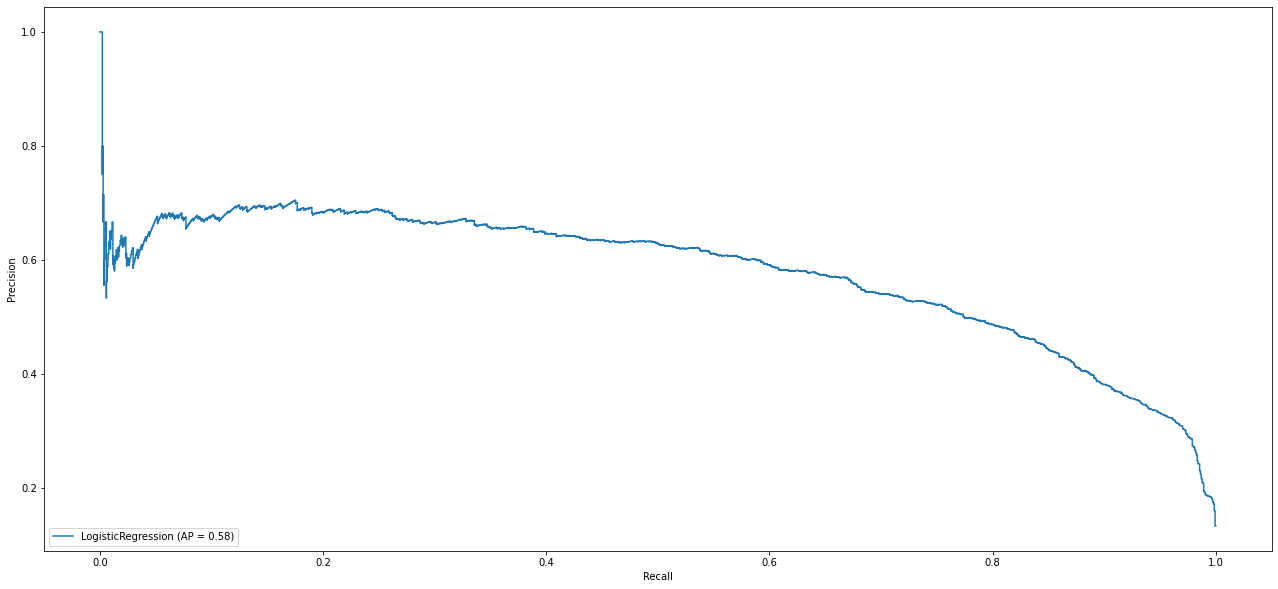

In [ ]:
from sklearn.metrics import plot_precision_recall_curve
plot_precision_recall_curve(clf, X_test, Y_test)

## Fine Tunning

In [ ]:
param_grid = { 
    'max_iter':[200,300,400]
    
}

In [ ]:
clf = LogisticRegression(random_state=7)

In [ ]:
from sklearn.model_selection import GridSearchCV
CV_clf = GridSearchCV(estimator=clf, param_grid=param_grid,\
                      cv= 2, verbose=2)

In [ ]:
CV_clf.fit(X_train_new,Y_train_new)

Fitting 2 folds for each of 3 candidates, totalling 6 fits
[CV] max_iter=200 ....................................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s remaining:    0.0s


[CV] ..................................... max_iter=200, total=   0.2s
[CV] max_iter=200 ....................................................


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


[CV] ..................................... max_iter=200, total=   0.2s
[CV] max_iter=300 ....................................................


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


[CV] ..................................... max_iter=300, total=   0.4s
[CV] max_iter=300 ....................................................


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


[CV] ..................................... max_iter=300, total=   0.3s
[CV] max_iter=400 ....................................................


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


[CV] ..................................... max_iter=400, total=   0.5s
[CV] max_iter=400 ....................................................


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    2.2s finished


[CV] ..................................... max_iter=400, total=   0.5s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


GridSearchCV(cv=2, error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=7, solver='lbfgs',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'max_iter': [200, 300, 400]}, pre_dispatch='2*n_jobs',
             refit=True, return_train_score=False, scoring=None, verbose=2)

In [ ]:
Y_predict=CV_clf.predict(X_test)

In [ ]:
print(CV_clf.best_params_)
print(CV_clf.cv_results_['mean_test_score'])
print(sum(CV_clf.cv_results_['mean_test_score'])/ len(CV_clf.cv_results_['mean_test_score']))

{'max_iter': 300}
[0.86772811 0.86803429 0.86711574]
0.8676260461318636


##Using Best Params

In [ ]:
clf = LogisticRegression(max_iter=300,random_state=7)

In [ ]:
clf.fit(X_train_new,Y_train_new)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=300,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=7, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
Y_predict=clf.predict(X_test)

In [ ]:
from sklearn.metrics import confusion_matrix,accuracy_score
# Calculate Confusion Matrix
cf_mat=confusion_matrix(Y_test,Y_predict)

# Calculate Accuracy
acc = accuracy_score(Y_test,Y_predict)

#Print Results
print("Confusion Matrix \n",cf_mat)
print("Accuracy : ",acc)

Confusion Matrix 
 [[9426 1557]
 [ 166 1208]]
Accuracy :  0.8605648620215263


In [ ]:
from sklearn.metrics import precision_recall_fscore_support
precision_recall_fscore_support(Y_test, Y_predict)

(array([0.98269391, 0.43688969]),
 array([0.85823545, 0.87918486]),
 array([0.91625759, 0.58371587]),
 array([10983,  1374]))

##XgBoost

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

In [ ]:
xgbc = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, random_state=7)

In [ ]:
xgbc.fit(X_train_new, Y_train_new)

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=1.0, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=7, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [ ]:
Y_pred = xgbc.predict(X_test)


In [ ]:
from sklearn.metrics import confusion_matrix,accuracy_score
cf=confusion_matrix(Y_test,Y_pred)
acc = accuracy_score(Y_test,Y_pred)
print("Accuracy",acc)
print("confusion Matrix\n",cf)

Accuracy 0.8617787488872704
confusion Matrix
 [[9436 1547]
 [ 161 1213]]


In [ ]:
from sklearn.metrics import precision_recall_fscore_support
precision_recall_fscore_support(Y_test,Y_pred)

(array([0.98322392, 0.43949275]),
 array([0.85914595, 0.88282387]),
 array([0.9170068 , 0.58684083]),
 array([10983,  1374]))

#### Fine tune

- n estimors

- subsample=1.0

- n_iter_no_change=None

- learning rate 

In [ ]:
param_grid = { 
    'n_estimators': [50,100,200],
    'subsample' : [0.7,0.8],
    'n_iter_no_change' : [10,15,50],
    'learning_rate' : [0.5,0.1,0.01]
}

In [ ]:
xgbc = GradientBoostingClassifier(random_state=7)

In [ ]:
from sklearn.model_selection import GridSearchCV
CV_xgbc = GridSearchCV(estimator=xgbc, param_grid=param_grid,\
                      cv= 2, verbose=2)

In [ ]:
CV_xgbc.fit(X_train_new, Y_train_new)

Fitting 2 folds for each of 54 candidates, totalling 108 fits
[CV] learning_rate=0.5, n_estimators=50, n_iter_no_change=10, subsample=0.7 
[CV]  learning_rate=0.5, n_estimators=50, n_iter_no_change=10, subsample=0.7, total=   0.1s
[CV] learning_rate=0.5, n_estimators=50, n_iter_no_change=10, subsample=0.7 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s


[CV]  learning_rate=0.5, n_estimators=50, n_iter_no_change=10, subsample=0.7, total=   0.1s
[CV] learning_rate=0.5, n_estimators=50, n_iter_no_change=10, subsample=0.8 
[CV]  learning_rate=0.5, n_estimators=50, n_iter_no_change=10, subsample=0.8, total=   0.1s
[CV] learning_rate=0.5, n_estimators=50, n_iter_no_change=10, subsample=0.8 
[CV]  learning_rate=0.5, n_estimators=50, n_iter_no_change=10, subsample=0.8, total=   0.1s
[CV] learning_rate=0.5, n_estimators=50, n_iter_no_change=15, subsample=0.7 
[CV]  learning_rate=0.5, n_estimators=50, n_iter_no_change=15, subsample=0.7, total=   0.1s
[CV] learning_rate=0.5, n_estimators=50, n_iter_no_change=15, subsample=0.7 
[CV]  learning_rate=0.5, n_estimators=50, n_iter_no_change=15, subsample=0.7, total=   0.2s
[CV] learning_rate=0.5, n_estimators=50, n_iter_no_change=15, subsample=0.8 
[CV]  learning_rate=0.5, n_estimators=50, n_iter_no_change=15, subsample=0.8, total=   0.2s
[CV] learning_rate=0.5, n_estimators=50, n_iter_no_change=15, s

[Parallel(n_jobs=1)]: Done 108 out of 108 | elapsed:   56.3s finished


GridSearchCV(cv=2, error_score=nan,
             estimator=GradientBoostingClassifier(ccp_alpha=0.0,
                                                  criterion='friedman_mse',
                                                  init=None, learning_rate=0.1,
                                                  loss='deviance', max_depth=3,
                                                  max_features=None,
                                                  max_leaf_nodes=None,
                                                  min_impurity_decrease=0.0,
                                                  min_impurity_split=None,
                                                  min_samples_leaf=1,
                                                  min_samples_split=2,
                                                  min_weight_fraction_leaf=0.0,
                                                  n_estimators=100,
                                                  n_iter_no_c...,
                

In [ ]:
print(CV_xgbc.best_params_)
print(CV_xgbc.cv_results_['mean_test_score'])
print(sum(CV_xgbc.cv_results_['mean_test_score'])/ len(CV_xgbc.cv_results_['mean_test_score']))

{'learning_rate': 0.1, 'n_estimators': 100, 'n_iter_no_change': 50, 'subsample': 0.8}
[0.87078996 0.87109614 0.87124923 0.86650337 0.8639008  0.86711574
 0.87078996 0.87109614 0.87124923 0.86650337 0.85946111 0.86298224
 0.87078996 0.87109614 0.87124923 0.86650337 0.85946111 0.86221678
 0.88058788 0.87905695 0.88058788 0.87905695 0.88058788 0.87905695
 0.88150643 0.88120024 0.88120024 0.88242498 0.88227189 0.88319045
 0.88150643 0.87966932 0.88120024 0.88089406 0.8821188  0.87982241
 0.86680955 0.86451317 0.86680955 0.86451317 0.86680955 0.86451317
 0.86879976 0.86895285 0.86879976 0.86895285 0.86879976 0.86895285
 0.8720147  0.8720147  0.8720147  0.8720147  0.8720147  0.8720147 ]
0.8723945930008393


##Model Fitting Using best params

In [ ]:
new_xgbc=GradientBoostingClassifier(learning_rate=0.1,n_estimators=100,n_iter_no_change=50,subsample=0.8,random_state=7)

In [ ]:
new_xgbc.fit(X_train_new, Y_train_new)

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=50, presort='deprecated',
                           random_state=7, subsample=0.8, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [ ]:
Y_pred=new_xgbc.predict(X_test)
Y_pred

array([0, 0, 0, ..., 0, 0, 1])

In [ ]:
from sklearn.metrics import confusion_matrix,accuracy_score
cf=confusion_matrix(Y_test,Y_pred)
acc = accuracy_score(Y_test,Y_pred)
print("Accuracy",acc)
print("confusion Matrix\n",cf)

Accuracy 0.8541717245286072
confusion Matrix
 [[9300 1683]
 [ 119 1255]]


In [ ]:
from sklearn.metrics import precision_recall_fscore_support
precision_recall_fscore_support(Y_test,Y_pred)

(array([0.98736596, 0.42716133]),
 array([0.84676318, 0.91339156]),
 array([0.91167533, 0.58209647]),
 array([10983,  1374]))

In [ ]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
0,44,blue-collar,married,basic.4y,unknown,yes,no,cellular,aug,thu,210,1,999,0,nonexistent,1.4,93.444,-36.1,4.963,5228.1,0
1,53,technician,married,unknown,no,no,no,cellular,nov,fri,138,1,999,0,nonexistent,-0.1,93.200,-42.0,4.021,5195.8,0
2,28,management,single,university.degree,no,yes,no,cellular,jun,thu,339,3,6,2,success,-1.7,94.055,-39.8,0.729,4991.6,1
3,39,services,married,high.school,no,no,no,cellular,apr,fri,185,2,999,0,nonexistent,-1.8,93.075,-47.1,1.405,5099.1,0
4,55,retired,married,basic.4y,no,yes,no,cellular,aug,fri,137,1,3,1,success,-2.9,92.201,-31.4,0.869,5076.2,1


In [ ]:
X_test.tail()

,age,duration,campaign,pdays,previous,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_divorced,marital_married,marital_single,marital_unknown,education_basic.4y,education_basic.6y,education_basic.9y,education_high.school,education_illiterate,education_professional.course,education_university.degree,education_unknown,default_no,default_unknown,default_yes,housing_no,housing_unknown,housing_yes,loan_no,loan_unknown,loan_yes,contact_cellular,contact_telephone,month_apr,month_aug,month_dec,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success
18401,31,528,1,999,0,1.1,93.994,-36.4,4.855,5191.0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0
8291,34,156,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0
13874,47,252,2,999,0,1.4,94.465,-41.8,4.967,5228.1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0
2272,31,297,3,999,0,1.1,93.994,-36.4,4.860,5191.0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0
11103,35,275,1,6,2,-1.7,94.215,-40.3,0.889,4991.6,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1


In [ ]:
import numpy as np
new=np.array([50,87,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0])

In [ ]:
type(new)

numpy.ndarray

In [ ]:
a=new.reshape(1,-1)

In [ ]:
y_pred=new_xgbc.predict(a)
y_pred

array([0])

In [ ]:
y=Y_test.tail(1)
y

11103    1
Name: y, dtype: int64

In [ ]:
acc = accuracy_score(y,y_pred)
acc

1.0

In [ ]:
new1=np.array([35,275,1,6,2,-1.7,94.215,-40.3,0.889,4991.6,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1])

In [ ]:
type(new1)

numpy.ndarray

In [ ]:
b=new1.reshape(1,-1)

In [ ]:
y_pred=new_xgbc.predict(b)
y_pred

array([1])

In [ ]:
acc = accuracy_score(y,y_pred)
acc

1.0